In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv') #Open file
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
df.value_counts(['SkinThickness'])

SkinThickness
0                227
32                31
30                27
27                23
23                22
33                20
18                20
28                20
31                19
39                18
19                18
29                17
37                16
26                16
22                16
40                16
25                16
35                15
41                15
36                14
15                14
17                14
20                13
24                12
42                11
13                11
21                10
34                 8
46                 8
38                 7
12                 7
14                 6
16                 6
11                 6
43                 6
45                 6
10                 5
44                 5
48                 4
47                 4
50                 3
49                 3
54                 2
52                 2
7                  2
8                  2
60                 1

In [5]:
df.value_counts(['Outcome']) #dataset is not entirely balanced

Outcome
0          500
1          268
dtype: int64

In [6]:
#Removing the SkinThickness column as there are too many 0s, also not interested in this feature
col_drop = ['SkinThickness']
df.drop(columns=col_drop, inplace=True)
df.head()

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0            6      148             72        0  33.6   
1            1       85             66        0  26.6   
2            8      183             64        0  23.3   
3            1       89             66       94  28.1   
4            0      137             40      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
df.value_counts(['BloodPressure'])
#Upon furture research, a valid Blood Pressure cannot be zero. Therefore the 35 counts of 0 BloodPressure values shall be removed.

BloodPressure
70               57
74               52
68               45
78               45
72               44
64               43
80               40
76               39
60               37
0                35
62               34
66               30
82               30
88               25
84               23
90               22
86               21
58               21
50               13
56               12
52               11
54               11
92                8
75                8
65                7
94                6
85                6
48                5
44                4
96                4
110               3
100               3
98                3
106               3
108               2
104               2
30                2
55                2
46                2
40                1
38                1
24                1
95                1
61                1
102               1
114               1
122               1
dtype: int64

In [8]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [9]:
#Now removing all entries (rows) containing 0 blood pressure values
df = df.loc[df['BloodPressure'] != 0]
df #35 rows dropped

Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
0              6      148             72        0  33.6   
1              1       85             66        0  26.6   
2              8      183             64        0  23.3   
3              1       89             66       94  28.1   
4              0      137             40      168  43.1   
..           ...      ...            ...      ...   ...   
763           10      101             76      180  32.9   
764            2      122             70        0  36.8   
765            5      121             72      112  26.2   
766            1      126             60        0  30.1   
767            1       93             70        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[733 rows x 8 columns]

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

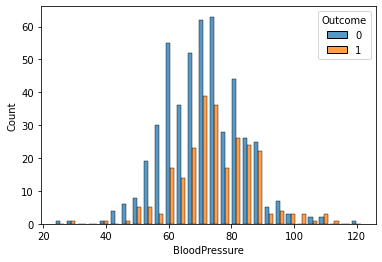

In [10]:
##Exploratory Data Analysis

#RQ: Diabetes are not dependent on patient's BloodPressure
import seaborn as sns

sns.histplot(x="BloodPressure", hue="Outcome", data=df, multiple="dodge", shrink=0.75)

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

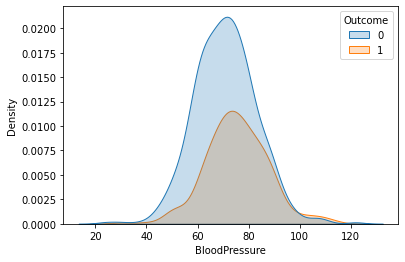

In [11]:
sns.kdeplot(x='BloodPressure', hue='Outcome', data=df, shade=True)

In [12]:
#testing some correlations......
cor2 = df['BloodPressure'].corr(df['Outcome'])
print(cor2)
cor3 = df['Pregnancies'].corr(df['Outcome'])
print(cor3)
#....

0.17058928446068447
0.23061874959371712


In [13]:
#T-test
import scipy
from scipy import stats
group1 = df['BloodPressure'].loc[df['Outcome'] == 0] #Population with no Diabetes
group2 = df['BloodPressure'].loc[df['Outcome'] == 1] #Population with Diabetes

stats.ttest_ind(group1, group2) #run ind sample t-test

#From the output table, we can see that the difference in means for our sample data is -4.68, Reject the Null Hypothesis that there is no difference in the true means of the two groups

Ttest_indResult(statistic=-4.680835112808535, pvalue=3.405150901552251e-06)

In [14]:
##Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sa

X = df[['BloodPressure','BMI','Glucose','DiabetesPedigreeFunction']] 
y = df['Outcome']


In [15]:
#Summary for OLS linear regression 
ols_lm = sa.OLS(y,X).fit()
ols_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.465
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              158.2
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                    2.02e-97
Time:                        19:03:48   Log-Likelihood:                         -419.73
No. Observations:                 733   AIC:                                      847.5
Df Residuals:                     729   BIC:                                      865.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BloodPressure               -0.0059      0.001     -5.600      0.000      -0.008      -0.004
BMI                          0.0054      0.002      2.515      0.012       0.001       0.010
Glucose                      0.0047      0.000      9.462      0.000       0.004       0.006
DiabetesPedigreeFunction     0.0972      0.048      2.024      0.043       0.003       0.191
==============================================================================
Omnibus:                      267.477   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.337
Skew:                           0.607   Prob(JB):                     3.59e-18
Kurtosis:                       1.925   Cond. No.                         446.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Building a linear model using 75/25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

In [17]:
accuracy_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
accuracy_table

Actual  Predicted
204       0   0.257247
195       1   0.637101
16        1   0.473746
33        0  -0.028625
407       0   0.074369
..      ...        ...
23        1   0.255185
612       1   0.744571
444       1   0.268277
37        1   0.247639
474       0   0.203351

[184 rows x 2 columns]

In [18]:
y_pred = np.where(y_pred >=0.5, 1, 0) #recoding prediction values

In [19]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.7120806225283838

In [20]:
##One-Way Anova
#add a new column category next to the BloodPressure group
category = pd.cut(df.BloodPressure, bins=[0,60,80,125], labels=['Low', 'Normal', 'High'])
df.insert(3, 'BP_Category', category)

In [21]:
df.sample(10)

Pregnancies  Glucose  BloodPressure BP_Category  Insulin   BMI  \
250            9      106             52         Low        0  31.2   
111            8      155             62      Normal      495  34.0   
460            9      120             72      Normal       56  20.8   
112            1       89             76      Normal       37  31.2   
610            3      106             54         Low      158  30.9   
692            2      121             70      Normal       95  39.1   
45             0      180             66      Normal        0  42.0   
96             2       92             62      Normal        0  31.6   
346            1      139             46         Low       83  28.7   
416            1       97             68      Normal        0  27.2   

     DiabetesPedigreeFunction  Age  Outcome  
250                     0.380   42        0  
111                     0.543   46        1  
460                     0.733   48        0  
112                     0.192   23        0  
610                     0.292   24        0  
692                     0.886   23        0  
45                      1.893   25        1  
96                      0.130   24        0  
346                     0.654   22        0  
416                     1.095   22        0

In [22]:
#!pip install scikit_posthocs
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp
lm2 = sfa.ols('Outcome ~ C(BP_Category)', data=df).fit()

In [23]:
(lm2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     12.60
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           4.18e-06
Time:                        19:03:48   Log-Likelihood:                -481.93
No. Observations:                 733   AIC:                             969.9
Df Residuals:                     730   BIC:                             983.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1870      0.042      4.432      0.000       0.104       0.270
C(BP_Category)[T.Normal]     0.1546      0.048      3.243      0.001       0.061       0.248
C(BP_Category)[T.High]       0.2797      0.056      5.017      0.000       0.170       0.389
==============================================================================
Omnibus:                     6301.223   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.227
Skew:                           0.618   Prob(JB):                     2.59e-25
Kurtosis:                       1.524   Cond. No.                         5.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Show Anova table
anova_table = sa.stats.anova_lm(lm2)
print(anova_table)

#The results tell us that there is significant difference between Blood Pressure group category means (p < 0.05), df=2.0

                   df      sum_sq   mean_sq          F    PR(>F)
C(BP_Category)    2.0    5.517504  2.758752  12.598873  0.000004
Residual        730.0  159.846753  0.218968        NaN       NaN


In [25]:
#Post-hoc Analysis
sp.posthoc_ttest(df, val_col='Outcome', group_col='BP_Category', p_adjust='holm')

#As seen from this table, significant differences in group means are obtained for all group pairs.

Normal       Low      High
Normal  1.000000  0.001968  0.004542
Low     0.001968  1.000000  0.000002
High    0.004542  0.000002  1.000000